In [24]:
##################################-- Turning Skills into Scores --###########################################
import pandas as pd

# Load the dataset
data = pd.read_excel('Clustered Jobs.xlsx')
all_skills =''
for skills in data['Top skills']:
   all_skills = all_skills +' '+  skills.replace(',',' ').replace('&','').replace('and','').replace('(','').replace(')','').replace('/','')

#print(all_skills)
words = all_skills.split()
#print(words)
word_counts = {}

# Count the occurrences of each word
for word in words:
    # Remove punctuation if necessary, convert to lowercase
    cleaned_word = word.lower()
    word_counts[cleaned_word] = word_counts.get(cleaned_word, 0) + 1

# Sort the word frequencies in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Print the sorted word frequencies
for word, count in sorted_word_counts:
    print(f"'{word}': {count}")


'autocad': 48
'management': 36
'adobe': 30
'photoshop': 25
'analysis': 19
'c#': 19
'reporting': 15
'general': 13
'ledger': 13
'accounting': 13
'marketing': 13
'finance': 12
'planning': 12
'project': 12
'microsoft': 12
'office': 12
'sales': 11
'5s': 11
'iso': 11
'current': 10
'stem': 10
'maintenance': 10
'account': 9
'3d': 9
'src': 9
'.html': 9
'business': 9
'c++': 9
'c': 9
'systems': 9
'tracking': 8
'application': 8
'process': 8
'asp.net': 8
'ms': 8
'electrical': 8
'solidworks': 7
'financial': 7
'catia': 7
'javascript': 7
'development': 7
'.css': 7
'safety': 7
'max': 6
'design': 6
'ansys': 6
'computer': 6
'matlab': 6
'4': 6
'java': 6
'occupational': 6
'health': 6
'illustrator': 5
'electric': 5
'budget': 5
'strategy': 5
'quality': 5
'9001': 5
'network': 5
'operator': 5
'data': 5
'sql': 5
'control': 5
'stock': 5
'erp': 5
'modeling': 4
'mechanical': 4
'bankingfinance': 4
'2': 4
'crm': 4
'digital': 4
'methods': 4
'14001': 4
'android': 4
'area': 4
'building': 4
'forklift': 4
'server': 4
'my

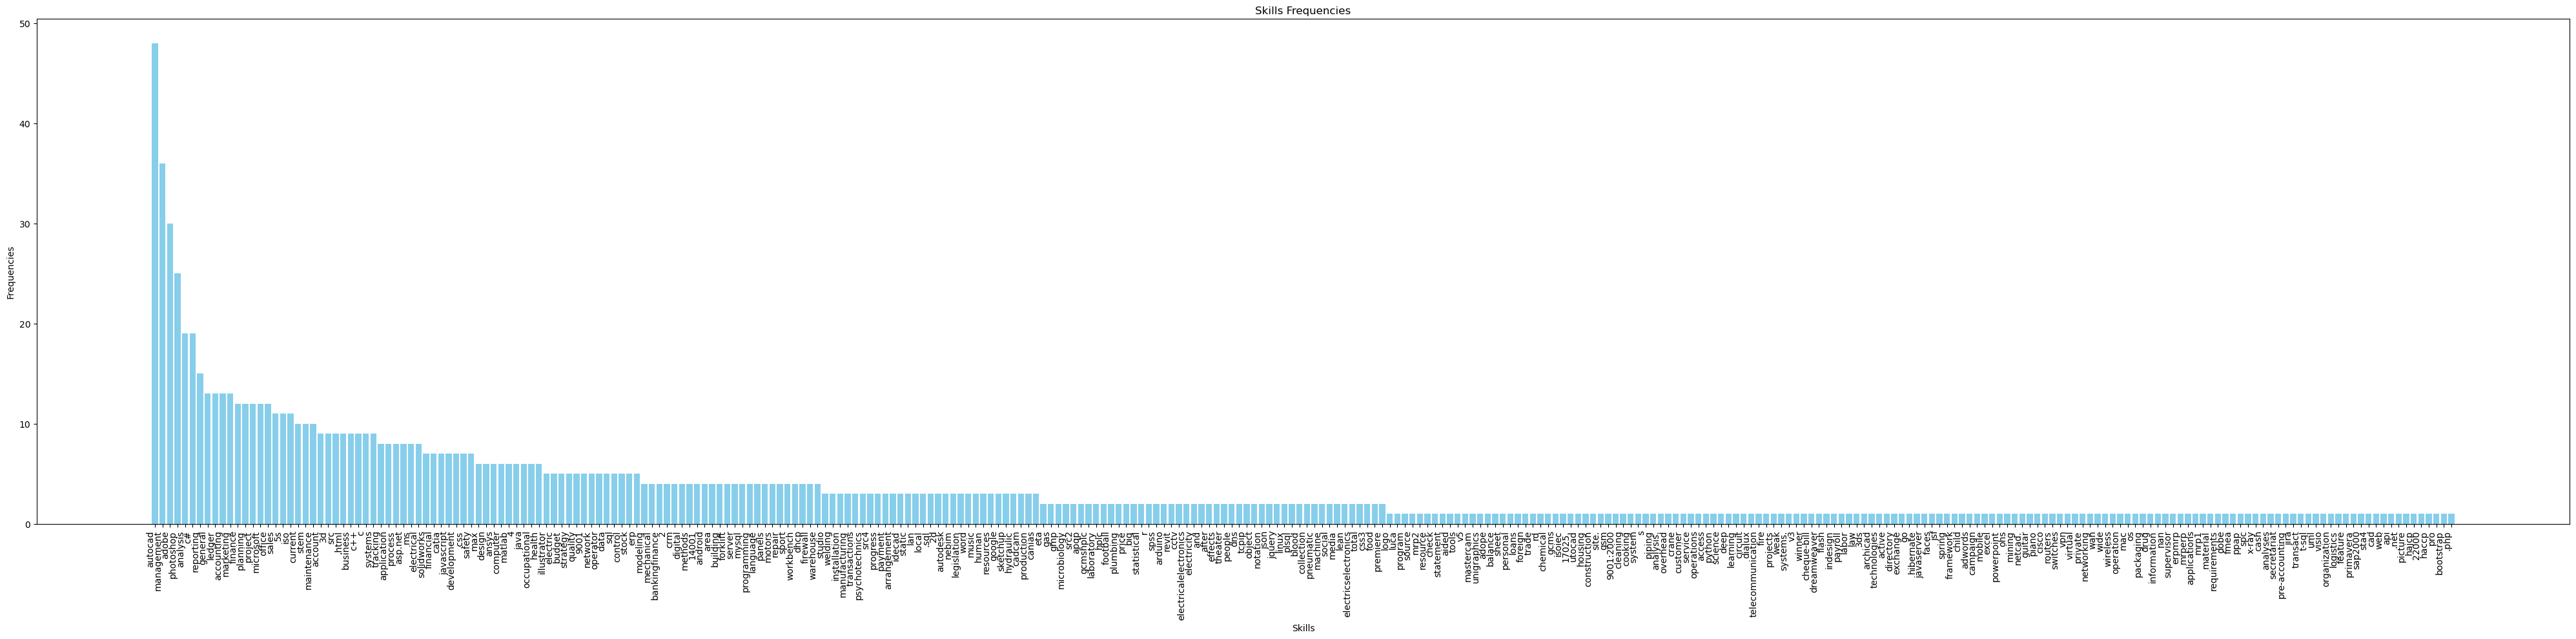

In [25]:
import matplotlib.pyplot as plt
# Extract words and frequencies from the sorted_word_counts
words, frequencies = zip(*sorted_word_counts)

# Plotting the histogram
plt.figure(figsize=(40, 10))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Skills')
plt.ylabel('Frequencies')
plt.title('Skills Frequencies')
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [26]:
def calculate_score(skill_combination, word_scores):
    # Split the skill combination into individual words
    words = skill_combination.replace('/n',' ').replace(',',' ').replace('&','').replace('and','').replace('(','').replace(')','').replace('/','').lower().split()
    #print(words)
    # Calculate the total score for the skill combination
    total_score = sum(word_scores[word] for word in words)
    return total_score


data['Skill_Score'] = data['Top skills'].apply(lambda x: calculate_score(x, word_counts))
data['Skill_Score']
data.to_excel('Numeric Skill Score Jobs.xlsx', index=False)


## Visualization

0      current account and finance tracking eta gener...
1          autocad reporting sales management solidworks
2      3d max 3d studio max 3d design and modeling ap...
3      electric welding gas welding  source mechanica...
4      current account transactions current account a...
                             ...                        
111      theater music microsoft office picture computer
112    food legislation hajcp iso 22000 food safety h...
113    adobe after effects adobe illustrator adobe ph...
114    football computer sales & marketing microsoft ...
115    adobe illustrator adobe photoshop bootstrap 4 ...
Name: Top skills, Length: 116, dtype: object


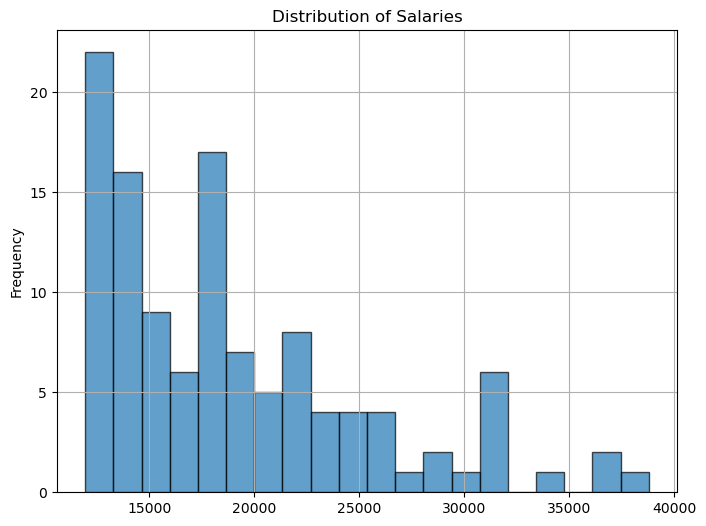

In [27]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import svm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


# Function to remove numbers and percentages from the 'top sectors' column
def clean_top_sectors(sector):
    if isinstance(sector, str):
        return re.sub(r'[0-9.%\n\n,]', '', sector)
    else:
        return sector

def preprocess_skills(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = text.replace(',', '').replace('\n', ' ')
    return text


# Load the dataset (assuming you have it in a CSV file)
data = pd.read_excel('Clustered Jobs.xlsx')

# Applying the function to the 'top sectors' column in the data
data['top sectors'] = [clean_top_sectors(sector) for sector in data['top sectors']]
data['top sectors'] = data['top sectors'].str.lower()

# Apply preprocessing to the 'Top skills' column
data['Top skills'] = data['Top skills'].apply(preprocess_skills)
print(data['Top skills'])

#####################################
plt.figure(figsize=(8, 6))
plt.hist(data['average salary ( TL)'], bins=20, edgecolor='k', alpha=0.7,)
plt.title(f'Distribution of Salaries')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



## Label Encoder

In [28]:
le1 = LabelEncoder()
le2 = LabelEncoder()

# Text Preprocessing
encoded_jobs = le1.fit_transform(data["Jobs listing "])
encoded_skills = le2.fit_transform(data["Top skills"])

# Data Preprocessing
X = pd.DataFrame({'Encoded_Jobs': encoded_jobs, 'Encoded_Skills': encoded_skills})
y = data['average salary ( TL)']

print(X)
print(y[0])

     Encoded_Jobs  Encoded_Skills
0               0              82
1               1              64
2               2               6
3               3              85
4               4              83
..            ...             ...
111           111             105
112           112              87
113           113              19
114           114              88
115           115              20

[116 rows x 2 columns]
13110


In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Model Selection and Training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model Evaluation
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"lr  Mean Absolute Error: {mae}")
###########################################

l = svm.SVC(kernel='rbf')
l.fit(X_train, y_train)
y_pred = l.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"svm  Mean Absolute Error: {mae}")

lr  Mean Absolute Error: 4615.872788094516
svm  Mean Absolute Error: 4273.888888888889


In [ ]:
# Inference
title = ["Architect","Architect","Architect"]
skill = ['3D Max 3D Studio Max 3D Design and Modeling Application Adobe Illustrator Adobe Photoshop','Adope photoshop , Autocad','Asp.Net C# .CSS .HTML Java']
print(le1.transform(title))
print(le2.transform(skill))

new_data = pd.DataFrame({'Encoded_Jobs': le1.transform(title),
                         'Encoded_Skills': le2.transform(skill)})

predicted_salary = lr.predict(new_data)
print("lr Predicted Salary: ",predicted_salary)

predicted_salary = l.predict(new_data)
print("svm Predicted Salary: ",predicted_salary)

[2 2 2]
[ 6 32 42]
lr Predicted Salary:  [20261.85351749 18815.93353046 18259.81045853]
svm Predicted Salary:  [21290 18690 18690]


## TFID

In [30]:
le = LabelEncoder()
vectorizer = TfidfVectorizer()

# Load the dataset (assuming you have it in a CSV file)
#data = pd.read_excel('Clustered Jobs.xlsx')

# Text Preprocessing
data['Jobs listing '] = data['Jobs listing '].str.lower()
encoded_jobs = le.fit_transform(data["Jobs listing "])
skills_tfidf = vectorizer.fit_transform(data['Top skills'])

# Data Preprocessing using skills and cluster
X = np.hstack((encoded_jobs.reshape(-1, 1), skills_tfidf.toarray(), data[['cluster']]))
#X = np.hstack((encoded_jobs.reshape(-1, 1),  data[['cluster']]))
y = data['average salary ( TL)']

print(X)


[[  0.   0.   0. ...   0.   0.   2.]
 [  1.   0.   0. ...   0.   0.   2.]
 [  2.   0.   0. ...   0.   0.   1.]
 ...
 [113.   0.   0. ...   0.   0.   1.]
 [114.   0.   0. ...   0.   0.   2.]
 [115.   0.   0. ...   0.   0.   1.]]


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

# Models Selection and Training
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, lr_y_pred)
print(f"lr  Mean Absolute Error: {mae}")

###########################################
import xgboost as xg
xgb = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 300, seed = 42)
xgb.fit(X_train, y_train)

xgb_y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, xgb_y_pred)
print(f"xgb  Mean Absolute Error: {mae}")

###################################################
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)
mae = mean_absolute_error(y_test, dt_y_pred)
print(f"DT  Mean Absolute Error: {mae}")

#########################################################
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, rf_y_pred)
print(f"RF  Mean Absolute Error: {mae}")
######################################################
from sklearn.svm import SVR
svr = SVR(kernel="linear", C=1220, gamma="auto")
svr.fit(X_train, y_train)

svr_y_pred = svr.predict(X_test)
mae = mean_absolute_error(y_test, svr_y_pred)
print(f"SVR  Mean Absolute Error: {mae}")

lr  Mean Absolute Error: 2084.0053184586714
xgb  Mean Absolute Error: 2767.4656575520835
DT  Mean Absolute Error: 3643.3333333333335
RF  Mean Absolute Error: 2855.6306666666665
SVR  Mean Absolute Error: 1390.4371924602674


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Define MAPE function 
def MAPE_error(Y_actual, Y_Predicted):
    Y_actual = Y_actual.ravel()
    Y_Predicted = Y_Predicted.ravel()
    mape = np.mean(np.abs((Y_actual - Y_Predicted) / Y_actual)) * 100
    return mape

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, lr_y_pred)
mape_lr = MAPE_error(y_test, lr_y_pred)
print(f"Linear Regression - MAE: {mae_lr}, MAPE: {mape_lr}%")

# XGBoost
xgb = xg.XGBRegressor(objective='reg:squarederror', n_estimators=300, seed=42)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, xgb_y_pred)
mape_xgb = MAPE_error(y_test, xgb_y_pred)
print(f"XGBoost - MAE: {mae_xgb}, MAPE: {mape_xgb}%")

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, dt_y_pred)
mape_dt = MAPE_error(y_test, dt_y_pred)
print(f"Decision Tree - MAE: {mae_dt}, MAPE: {mape_dt}%")

# Random Forest
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, rf_y_pred)
mape_rf = MAPE_error(y_test, rf_y_pred)
print(f"Random Forest - MAE: {mae_rf}, MAPE: {mape_rf}%")

# Support Vector Regression
svr = SVR(kernel="linear", C=1220, gamma="auto")
svr.fit(X_train, y_train)
svr_y_pred = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, svr_y_pred)
mape_svr = MAPE_error(y_test, svr_y_pred)
print(f"SVR - MAE: {mae_svr}, MAPE: {mape_svr}%")

Linear Regression - MAE: 2084.0053184586714, MAPE: 12.021572235307785%
XGBoost - MAE: 2767.4656575520835, MAPE: 13.266392137909428%
Decision Tree - MAE: 3643.3333333333335, MAPE: 16.36976028653965%
Random Forest - MAE: 2855.6306666666665, MAPE: 13.4688139092946%
SVR - MAE: 1390.4371924602674, MAPE: 7.410154989791402%


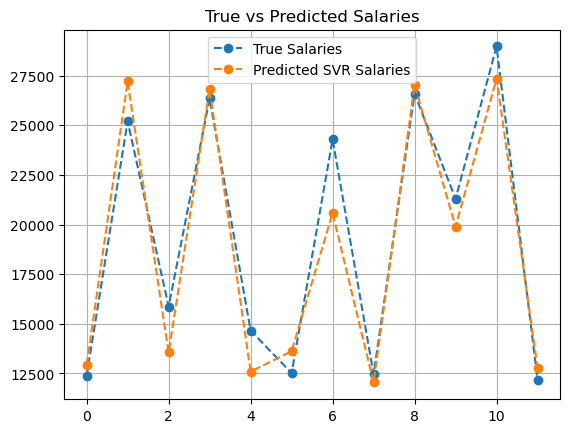

In [33]:
plt.plot(range(len(X_test)), y_test, 'o--', label='True Salaries')
plt.plot(range(len(X_test)), svr_y_pred, 'o--', label='Predicted SVR Salaries')
plt.title('True vs Predicted Salaries')

plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Inference
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Sample input data for inference
# inference_data = pd.DataFrame({
#     'Jobs listing ': ["Computer Programmer","Computer Programmer","Computer Programmer"],
#     'Top skills': ['Asp.Net ,C# ,.CSS ,.HTML, Java',
#                    'Asp.Net ,C#',
#                    'Cooking']
# })

inference_data = pd.DataFrame({
    'Jobs listing ': ["Computer Programmer","Computer Programmer","Computer Programmer"],
    'Top skills': ['Asp.Net ,C# ,.CSS ,.HTML, Java',
                   'Asp.Net ,C#',
                   'Cooking'],
    'cluster':[0,1,2]
})

# Preprocess the input data
#inference_data['Top skills'] = inference_data['Top skills'].str.split(',').apply(lambda x: ' '.join(x))
skills_tfidf = vectorizer.transform(inference_data['Top skills'].apply(preprocess_skills))
encoded_jobs = le.transform(inference_data["Jobs listing "].str.lower())

# Combine the features for inference
X_inference = np.hstack((encoded_jobs.reshape(-1, 1), skills_tfidf.toarray(), inference_data[['cluster']]))
#X_inference = np.hstack((encoded_jobs.reshape(-1, 1), skills_tfidf.toarray()))

# Make predictions using linear regression
predictions = lr.predict(X_inference)
print("lr Predicted Salary:", predictions)

# Make predictions using random forrests
predictions = dt.predict(X_inference)
print("DT Predicted Salary:", predictions)

# Make predictions using XGB
predictions = xgb.predict(X_inference)
print("xgb Predicted Salary:", predictions)

# Make predictions using RF
predictions = rf.predict(X_inference)
print("RF Predicted Salary:", predictions)

# Make predictions using SVR
predictions = svr.predict(X_inference)
print("SVR Predicted Salary:", predictions)

lr Predicted Salary: [25765.7337933  18992.00540865 12389.36815864]
DT Predicted Salary: [31190. 16790. 13920.]
xgb Predicted Salary: [29175.582 18281.766 13674.26 ]
RF Predicted Salary: [30712.84  18261.2   13574.148]
SVR Predicted Salary: [28770.50368421 20780.3137465  13649.89706918]


## Skill scores

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import svm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


le = LabelEncoder()


# Load the dataset (assuming you have it in a CSV file)
data = pd.read_excel('Numeric Skill Score Jobs.xlsx')

# Text Preprocessing
data['Jobs listing '] = data['Jobs listing '].str.lower()
encoded_jobs = le.fit_transform(data["Jobs listing "])

# Data Preprocessing using skills and cluster
X = np.hstack((encoded_jobs.reshape(-1, 1), data[['Skill_Score']], data[['cluster']]))
y = data['average salary ( TL)']

print(X)


[[  0  83   2]
 [  1 117   2]
 [  2 150   1]
 [  3  38   1]
 [  4 121   1]
 [  5  88   1]
 [  6 184   0]
 [  7  74   2]
 [  8   4   2]
 [  9  65   1]
 [ 10  36   1]
 [ 11  77   1]
 [ 12 296   0]
 [ 13  94   2]
 [ 14  53   2]
 [ 15  46   2]
 [ 16 121   1]
 [ 17  19   1]
 [ 18  92   1]
 [ 19  34   2]
 [ 20  66   1]
 [ 21  49   1]
 [ 22  68   1]
 [ 23  79   1]
 [ 24  91   2]
 [ 25 158   2]
 [ 26  13   2]
 [ 27 143   1]
 [ 28 129   2]
 [ 29  43   0]
 [ 30 199   1]
 [ 31  31   2]
 [ 32  95   1]
 [ 33 179   1]
 [ 34  87   2]
 [ 35 109   2]
 [ 36  55   2]
 [ 37 140   2]
 [ 38  94   2]
 [ 39  58   2]
 [ 40  81   1]
 [ 41  87   1]
 [ 42 162   2]
 [ 43  43   2]
 [ 44  60   2]
 [ 45  86   2]
 [ 46 240   1]
 [ 47  86   2]
 [ 48  38   0]
 [ 49 170   1]
 [ 50  38   1]
 [ 51 117   0]
 [ 52   8   2]
 [ 53   8   2]
 [ 54  93   2]
 [ 55 100   1]
 [ 56 100   0]
 [ 57 118   2]
 [ 58 329   0]
 [ 59  88   1]
 [ 60  95   2]
 [ 61 107   2]
 [ 62  92   1]
 [ 63   9   2]
 [ 64  52   0]
 [ 65   4   2]
 [ 66  74 

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69)

# Models Selection and Training
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, lr_y_pred)
print(f"lr  Mean Absolute Error: {mae}")

###########################################
import xgboost as xg
xgb = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 300)
xgb.fit(X_train, y_train)

xgb_y_pred = xgb.predict(X_test)
mae = mean_absolute_error(y_test, xgb_y_pred)
print(f"xgb  Mean Absolute Error: {mae}")

###################################################
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)
mae = mean_absolute_error(y_test, dt_y_pred)
print(f"DT  Mean Absolute Error: {mae}")

######################################################
from sklearn.svm import SVR
svr = SVR(kernel="linear", C=1220, gamma="auto")
svr.fit(X_train, y_train)

svr_y_pred = svr.predict(X_test)
mae = mean_absolute_error(y_test, svr_y_pred)
print(f"SVR  Mean Absolute Error: {mae}")

#########################################################
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, rf_y_pred)
print(f"RF  Mean Absolute Error: {mae}")

lr  Mean Absolute Error: 1490.7129618664148
xgb  Mean Absolute Error: 1655.5486653645833
DT  Mean Absolute Error: 1392.5
SVR  Mean Absolute Error: 1466.1041005526658
RF  Mean Absolute Error: 1024.0236666666665


In [36]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Define MAPE function 
def MAPE_error(Y_actual, Y_Predicted):
    Y_actual = Y_actual.ravel()
    Y_Predicted = Y_Predicted.ravel()
    mape = np.mean(np.abs((Y_actual - Y_Predicted) / Y_actual)) * 100
    return mape

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69)

# Models Selection and Training
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, lr_y_pred)
mape_lr = MAPE_error(y_test, lr_y_pred)
print(f"Linear Regression - MAE: {mae_lr}, MAPE: {mape_lr}%")

# XGBoost
xgb = xg.XGBRegressor(objective='reg:squarederror', n_estimators=300)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, xgb_y_pred)
mape_xgb = MAPE_error(y_test, xgb_y_pred)
print(f"XGBoost - MAE: {mae_xgb}, MAPE: {mape_xgb}%")

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, dt_y_pred)
mape_dt = MAPE_error(y_test, dt_y_pred)
print(f"Decision Tree - MAE: {mae_dt}, MAPE: {mape_dt}%")

# Support Vector Regression
svr = SVR(kernel="linear", C=1220, gamma="auto")
svr.fit(X_train, y_train)
svr_y_pred = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, svr_y_pred)
mape_svr = MAPE_error(y_test, svr_y_pred)
print(f"SVR - MAE: {mae_svr}, MAPE: {mape_svr}%")

# Random Forest
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, rf_y_pred)
mape_rf = MAPE_error(y_test, rf_y_pred)
print(f"Random Forest - MAE: {mae_rf}, MAPE: {mape_rf}%")

Linear Regression - MAE: 1490.7129618664148, MAPE: 9.513637919278443%
XGBoost - MAE: 1655.5486653645833, MAPE: 10.658166019003906%
Decision Tree - MAE: 1392.5, MAPE: 8.250128392128634%
SVR - MAE: 1466.1041005526658, MAPE: 9.250748834468315%
Random Forest - MAE: 1024.0236666666665, MAPE: 6.549580931894368%


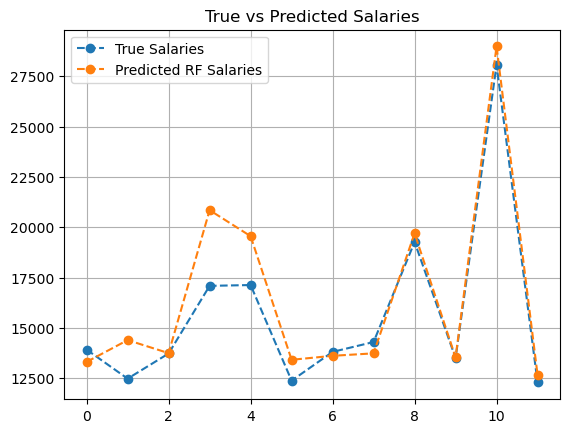

In [37]:
plt.plot(range(len(X_test)), y_test, 'o--', label='True Salaries')
plt.plot(range(len(X_test)), rf_y_pred, 'o--', label='Predicted RF Salaries')
plt.title('True vs Predicted Salaries')

plt.grid(True)
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
for model in[dt,svr,lr,xgb,rf]:
  cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

  # Convert the negative MAE scores to positive
  cv_scores = -cv_scores

  # Print the cross-validation scores
  print(f"{type(model).__name__} Mean MAE:", cv_scores.mean())

DecisionTreeRegressor Mean MAE: 2188.1963768115943
SVR Mean MAE: 2018.3109423544229
LinearRegression Mean MAE: 1962.4913552952917
XGBRegressor Mean MAE: 1777.2131613026493
RandomForestRegressor Mean MAE: 1766.1415144927537


In [39]:
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error

# Define MAPE function 
def MAPE_error(Y_actual, Y_Predicted):
    Y_actual = Y_actual.ravel()
    Y_Predicted = Y_Predicted.ravel()
    mape = np.mean(np.abs((Y_actual - Y_Predicted) / Y_actual)) * 100
    return mape

# Perform 5-fold cross-validation
for model in [dt, svr, lr, xgb, rf]:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

    # Convert the negative MAE scores to positive
    cv_scores = -cv_scores

    # Print the cross-validation scores
    print(f"{type(model).__name__} Mean MAE:", cv_scores.mean())

    # Use cross_val_predict to get predictions for each fold
    cv_predictions = cross_val_predict(model, X, y, cv=5)

    # Calculate MAPE for each fold
    mape_scores = MAPE_error(y, cv_predictions)

    # Print the Mean MAPE
    print(f"{type(model).__name__} Mean MAPE:", np.mean(mape_scores))

DecisionTreeRegressor Mean MAE: 2188.1963768115943
DecisionTreeRegressor Mean MAPE: 11.19682845237311
SVR Mean MAE: 2018.3109423544229
SVR Mean MAPE: 9.92957348229929
LinearRegression Mean MAE: 1962.4913552952917
LinearRegression Mean MAPE: 10.02737073288968
XGBRegressor Mean MAE: 1777.2131613026493
XGBRegressor Mean MAPE: 8.966709742083424
RandomForestRegressor Mean MAE: 1766.1415144927537
RandomForestRegressor Mean MAPE: 8.985052893188897


## Clustering Sectors

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import re

# Function to remove numbers and percentages from the 'top sectors' column
def clean_top_sectors(sector):
    if isinstance(sector, str):
        return re.sub(r'[0-9.%\n\n,]', '', sector)
    else:
        return sector

# Load the dataset (assuming you have it in a CSV file)
df = pd.read_excel('Filtered Jobs.xlsx')

# Applying the function to the 'top sectors' column in the data
df['top sectors'] = [clean_top_sectors(sector) for sector in df['top sectors']]

df['Jobs listing '] = df['Jobs listing '].str.lower()
df['top sectors'] = df['top sectors'].str.lower()

print(df['top sectors'])


# Data Preprocessing
le = LabelEncoder()

# Encoding sectors
#df['encoded_skills'] = le.fit_transform(df['Top skills'])
df['encoded_sectors'] = le.fit_transform(df['top sectors'])

# Combine encoded features into a feature matrix
X = df[['encoded_sectors','average salary ( TL)']]


0      financial consultance  
1                 agriculture 
2                architecture 
3                   automotive
4                construction 
                ...           
111                  education
112              veterinarians
113                      media
114                    tourism
115                informatics
Name: top sectors, Length: 116, dtype: object


In [ ]:
len(df['encoded_sectors'])

116

In [ ]:
len(df['encoded_sectors'].unique())

50

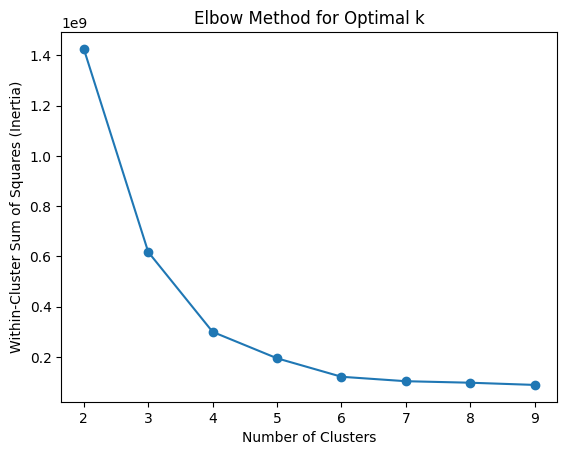

In [ ]:
inertia = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i,n_init='auto', random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

# from sklearn.metrics import silhouette_score
# sil_scores = []
# for i in range(2, 10):
#     kmeans = KMeans(n_clusters=i,n_init='auto', random_state=42)
#     cluster_labels = kmeans.fit_predict(X)
#     silhouette_avg = silhouette_score(X, cluster_labels)
#     sil_scores.append(silhouette_avg)

# plt.plot(range(2, 10), sil_scores, marker='o')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score for Optimal k')
# plt.show()


In [ ]:
# Clustering (assuming 3 clusters for demonstration purposes)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X)

# Assign clusters back to the DataFrame
df['cluster'] = clusters

# Print the clustered job listings
clusters_df = df[['Jobs listing ','average salary ( TL)','lowest monthly salary (Tl)','highest monthly salary (TL)',
                  'Top skills','top sectors','cluster','Top 5 University they graduated from']]
clusters_df.to_excel('Clustered Jobs.xlsx', index=False)
clusters_df.head()

,Jobs listing,average salary ( TL),lowest monthly salary (Tl),highest monthly salary (TL),Top skills,top sectors,cluster,Top 5 University they graduated from
0,accounting staff,13110,11400,22500,Current Account and Finance Tracking ETA Gener...,financial consultance,2,Anadolu University\nKocaeli University\nDumlup...
1,agricultural engineer,16330,13070,37000,"Autocad, Reporting Sales, Management ,SOLIDWORKS",agriculture,2,Cukurova University\nEge University\nAnkara Un...
2,architect,21290,17030,78710,3D Max 3D Studio Max 3D Design and Modeling Ap...,architecture,1,Yıldız Technical University (YTU)\nIstanbul Te...
3,argon welder,18690,14950,35000,Electric Welding GAS WELDING \nSource\nMechani...,automotive,1,\nAnadolu University\nKocaeli University\nÇuku...
4,assistant accounting manager,22210,17770,39170,Current Account Transactions Current Account a...,construction,1,Anadolu University\nIstanbul University (IU)\n...


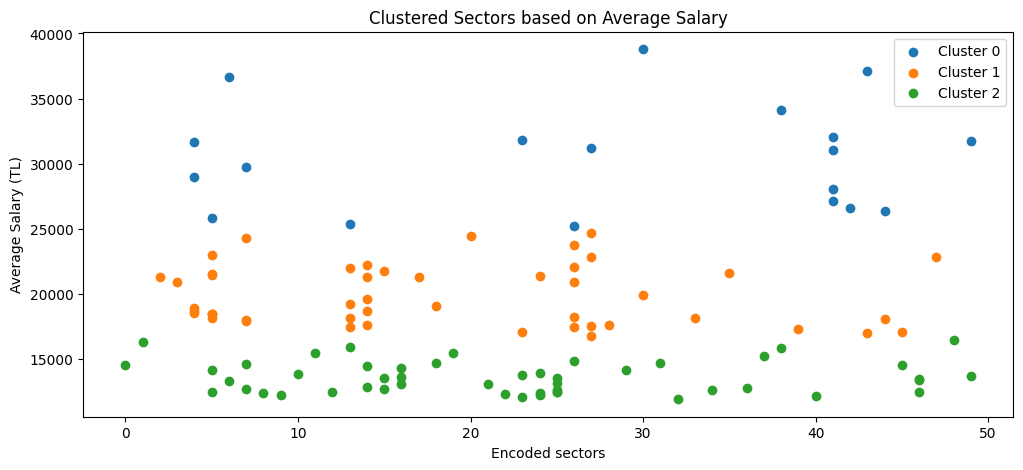

In [ ]:
# Plot clustered jobs
plt.figure(figsize=(12, 5))

# Loop through clusters and plot data points
for i  in range(n_clusters):
    cluster_data = df[df['cluster'] == i]
    plt.scatter(cluster_data['encoded_sectors'], cluster_data['average salary ( TL)'], label=f'Cluster {i}', marker='o')

plt.xlabel('Encoded sectors')
plt.ylabel('Average Salary (TL)')

plt.title('Clustered Sectors based on Average Salary')
plt.legend()
plt.show()